# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

# Task 1 : Environment Set up

In [1]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [2]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names

In [5]:
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [6]:
# print top 5 observations
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


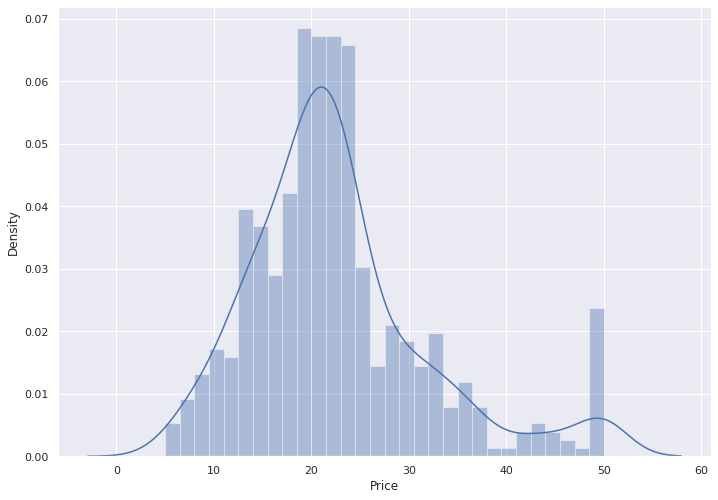

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['Price'], bins=30)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables

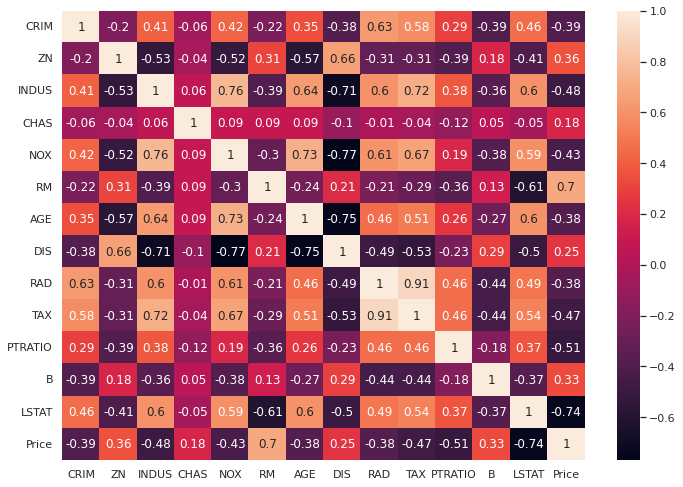

In [10]:
correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Write Your Observations

The strongest correlation appears to be between RM which is the average number of rooms per dwelling and price where we have a 0.7 correlation. Meanwhile weakest correlation appears to be between LSTAT that measures "% lower status of the population" and price with -0.74 correlation

Notice that CRIM has a correlation of -0.39 with price. It is expected to have a negative correlation between price and the crime rate of a desire neighborhood; however, you expect that correlation to have a stronger negative correlation.

There are also positive traits that you can associate with a desirable  neighborhood that appear to be weakly correlated such as PTRATIO and RAD. Normally you would expect easy access to highways and reasonable distance from home to work have positive correlation. Meaning that the closer a dwelling is to the office would be positively correlative with price

# Preparing the data for training the Machine Learning Model

In [11]:
# assign features on X axis 
X_features = boston_dataset.data

In [12]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [13]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [14]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression()

In [15]:
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [16]:
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


# Model Training

In [17]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [18]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [19]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [20]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression()

# Caluclate RMSE and R Square:


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
y_train_predict = lineReg.predict(X_train)

In [23]:
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

In [24]:
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.818327642869975
R2 score is 0.7426219618683843




In [25]:
# model evaluation for testing set

y_test_predict = lineReg.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.431148958967193
R2 score is 0.7071968400143978


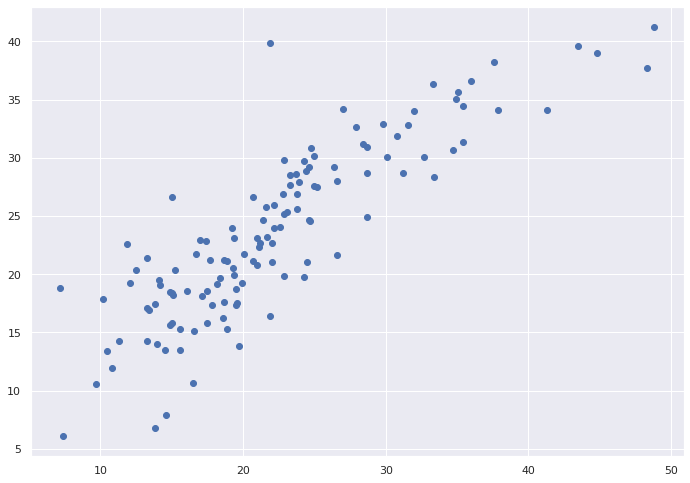

In [26]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

# Your Conclusion 

The testing set has a RMSE of 4.43 and R^2 score of 0.70. RMSE is a measure of how concentrated the data is around the line of best fit and an ideal RMSE score is between 0.2 and 0.5. In this case we have a very high RMSE, and this indicates we badly over fit the data. This means that created a model that test well but has little predictive value. 

R^2 measures the proportion of the variation in the dependent variable that is influence by the independent variable(s). R^2 provides a measure how well observed outcomes are replicated by the model and since it has a score of 0.70, that score may explain why the set test well despite having little predictive value.


The training set has a RMSE of 4.82 and a R^2 score of 0.74. Which reflects the smaller testing set.